# Project 3: Wrangle and Analyze Data

São Paulo, 03 june of 2019

Felipe Mahlmeister

## Table of Contents
1. [Introduction](#intro)<br>
    1.1. [Key Points](#key_points)<br>
2. [Data Wrangling](#data_wrangling)<br>
    2.1. [Gather](#gather)<br>
    2.2. [Assess](#assess)<br>
    2.3. [Clean](#clean)<br>
3. [Data Analysis](#data_analysis)<br>
    3.1. [Storing](#storing)<br>
    3.2. [Analyzing and Visualizing](#analyzing)<br>

<a id='intro'></a>
# 1. Introduction

This project will wrangling (and analyzing and visualizing) an dataset from the tweet archive of Twitter user <a href="https://twitter.com/dog_rates">@dog_rates</a>, also known as <a href="https://en.wikipedia.org/wiki/WeRateDogs">WeRateDogs</a>. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.

<a id='key_points'></a>
## 1.1. Key points

Key points of data wrangling for this project:

- We'll look only at original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='data_wrangling'></a>
# 2. Data Wrangling

<a id='gather'></a>
## 2.1. Gather

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import json
import time
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

### Gather Dataframes

In order to gather all necessary dataframes, we need to divide this topic in 3 steps:

2.1. [Gather](#gather)<br>
    2.1.1. [Import Twitter Archive](#import_twitter_1)<br>
    2.1.2. [Import Tweet image predictions](#import_twitter_2)<br>
    2.1.3. [Import additional data from Twitter](#import_twitter_3)<br>
    2.1.4. [Gather Summary](#gather_summary)<br>

<a id='import_twitter_1'></a>
### 2.1.1. Import Twitter Archive

In [2]:
# Import Twitter archive enhanced by reading from csv file, using pandas

twitter_archive_raw = pd.read_csv('source/twitter-archive-enhanced.csv')
twitter_archive = twitter_archive_raw.copy()

<a id='import_twitter_2'></a>
### 2.1.2. Import Tweet image predictions

In [3]:
# Import tweet image predictions by downloading image predictions file from Udacity website using requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urlData = requests.get(url)

with open('source/image-predictions.tsv', mode ='wb') as file:
    file.write(urlData.content)

# Load image predictions file
images_predict_raw = pd.read_csv('source/image-predictions.tsv', sep = '\t')
images_predict = images_predict_raw.copy()

<a id='import_twitter_3'></a>
### 2.1.3. Import additional data from Twitter

In [4]:
# Setting up the Twitter API connection settings

# Variables that contain the user credentials to access Twitter API
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

# Connecting with tweepy API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [5]:
# Import additional data from Twitter, utilizing Queries from Twitter API 

# List of tweets with actual data
tweet_data_list = []

# List of the missing tweets
tweet_id_missing = []

# List of sucessfully imported tweets
tweet_id_success = []

# Calculate the time of execution
start = time.time()

# For loop which will add each available tweet json to tweet_data
# This loop is as simple as possible to avoid too much execution time
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_id_success.append(tweet_id)
        tweet_data_list.append(tweet)
               
    except Exception as e:
        print(str(tweet_id)+ " - " + str(e))
        tweet_id_missing.append(tweet_id)
        
# Calculate the time of execution
end = time.time()
print('-----------------------------------------------------')
print('execution time: ',end - start, 'seconds')
print('execution time: ',(end - start)/60, 'minutes')

888202515573088257 - [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 - [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 - [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 - [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 - [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 - [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 - [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 - [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 - [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 - [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 - [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 - [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 - [{'code

Rate limit reached. Sleeping for: 579


754011816964026368 - [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 - [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 692


-----------------------------------------------------
execution time:  1938.7829999923706 seconds
execution time:  32.313049999872845 minutes


In [6]:
print("# of tweets successfully imported: ", len(tweet_data_list))
print("# of tweets missing: ", len(tweet_id_missing))

# of tweets successfully imported:  2335
# of tweets missing:  21


From the above results:

<ul>
    <li>We reached the limit of Tweetpy API two times (we slept for 20 minutes - 60% of execution time) but wait_on_rate_limit automatically re-estabilished the conection</li>
    <li>We got 2335 tweets sucessfuly imported and 21 erros (99% of sucess rate)</li>
    <li>The total execution time was about 32 minutes</li>
</ul>

In [7]:
# All tweets are embedded in a big list, we need to break it into
# individual pieces and isolate json the part of each tweepy object,
# then we will add them all into a list

tweet_data_list_of_dict = []
for each_json_tweet in tweet_data_list:
    tweet_data_list_of_dict.append(each_json_tweet)
    
# Writing a text file with this list of dictionaires:

with open('source/tweet-json.txt', 'w') as file:
        file.write(json.dumps(tweet_data_list_of_dict, indent=4))

In [8]:
# # Getting all JSON objects of all the tweets using Tweepy

# In order to avoid complex "for loop" during the Gathering of data from Twitter, 
# we kept it as simple as possible, and now we will read the 'tweet-json.txt' file with all the data
# and chose the variables of interest to generate a Dataframe with it

transitional_list = []

# Calculate the time of execution
start = time.time()

with open('source/tweet-json.txt', encoding='utf-8') as json_file: 
    
    tweet_data_all = json.load(json_file)
    
    for dictionary in tweet_data_all:
        
        tweet_id = dictionary['id']
        source = dictionary['source']
        device = source[source.find('rel="nofollow">') + 15:-4]
        user = dictionary['user']
        followers_count = user['followers_count']
        retweet_count = dictionary['retweet_count']
        favorite_count = dictionary['favorite_count']
        retweeted = dictionary['retweeted']
        text = dictionary['full_text']
        date_time = dictionary['created_at']
        
        transitional_list.append({'tweet_id': str(tweet_id),
                                  'device': str(device),
                                  'followers_count': int(followers_count),
                                  'retweet_count': int(retweet_count),
                                  'favorite_count': int(favorite_count),
                                  'retweeted': retweeted,
                                  'text': text,
                                  'date_time': pd.to_datetime(date_time)
                                 })
        
        tweet_data = pd.DataFrame(transitional_list, columns = ['tweet_id',
                                                                'device',
                                                                'followers_count',
                                                                'retweet_count',
                                                                'favorite_count',
                                                                'retweeted',
                                                                'text',
                                                                'date_time'
                                                               ])

# Calculate the time of execution
end = time.time()
print('-----------------------------------------------------')
print('execution time: ',end - start, 'seconds')
print('execution time: ',(end - start)/60, 'minutes')

-----------------------------------------------------
execution time:  9.707377195358276 seconds
execution time:  0.16178961992263793 minutes


<a id='gather_summary'></a>
### 2.1.4. Gather Summary

We completed the first step of Data Wrangling process !



Summary:<br><br>
    2.1.1. Imported Twitter archive enhanced by reading from csv file, using pandas<br>
    2.1.2. Imported tweet image predictions by downloading image predictions file from Udacity website using requests <br>
    2.1.3. Imported additional data from Twitter, utilizing Queries from Twitter API and getting all JSON objects of all the tweets using Tweepy<br>
    
Now we're ready to continue the Data Wrangling process:

<a id='assess'></a>
## 2.2. Assess Dataframes

We will assess the dataframes `twitter_archive`, `images_predict` and `tweet data` both visually and programmatically for identify quality and tidiness issues using pandas. We will also documentate all the issues for further cleaning, as follows:

2.2.1. [Visual Assessment](#visual_assessment)<br>
2.2.2. [Programmatic Assessment](#programmatic_assessment)<br>
2.2.3. [Quality](#quality)<br>
2.2.4. [Tidiness](#tidiness)

<a id='visual_assessment'></a>
### 2.2.1. Visual Assessment

Let's take a look of our gathered data:

In [9]:
# Printing some random examples

twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,None,None,pupper,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None
1930,674038233588723717,NaN,NaN,2015-12-08 01:30:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaiya. She's an aspiring shoe model. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674038233...,12,10,Kaiya,None,None,pupper,None


In [10]:
# Printing some random examples

images_predict.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
555,677662372920729601,https://pbs.twimg.com/media/CWeKTZTWsAA5R3Z.jpg,1,cowboy_hat,0.256110,False,trench_coat,0.127086,False,cloak,0.071439,False
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True


In [11]:
# Printing some random examples

tweet_data.sample(3)

,tweet_id,device,followers_count,retweet_count,favorite_count,retweeted,text,date_time
2130,669682095984410625,Twitter for iPhone,8134212,136,349,False,Meet Louie. He just pounded that bottle of win...,2015-11-26 01:00:28+00:00
1058,739485634323156992,Twitter for iPhone,8134174,3061,7388,False,This is Kyle. He's a heavy drinker and an avid...,2016-06-05 15:54:48+00:00
693,784826020293709826,Twitter for iPhone,8134150,3475,10652,False,This is Rusty. He's going D1 for sure. Insane ...,2016-10-08 18:41:19+00:00


<a id='programmatic_assessment'></a>
### 2.2.2. Programmatic Assessment

Assessing programmatically `twitter_archive`, `images_predict` and `tweet data` dataframes

#### twitter_archive

In [12]:
twitter_archive.shape

(2356, 17)

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_archive.loc[:,'tweet_id'].duplicated().sum()

0

In [16]:
twitter_archive.loc[:,'source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
numerator_check_list = twitter_archive.loc[:,'rating_numerator'].value_counts()
numerator_check_list

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive.loc[:,'rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.loc[:,'retweeted_status_timestamp'].sample(5)

1095    NaN
1823    NaN
2067    NaN
549     NaN
788     NaN
Name: retweeted_status_timestamp, dtype: object

In [20]:
print('doggo unique values:',twitter_archive.loc[:,'doggo'].unique())
print('floofer unique values:',twitter_archive.loc[:,'floofer'].unique())
print('pupper unique values:',twitter_archive.loc[:,'pupper'].unique())      
print('puppo unique values:',twitter_archive.loc[:,'puppo'].unique())

doggo unique values: ['None' 'doggo']
floofer unique values: ['None' 'floofer']
pupper unique values: ['None' 'pupper']
puppo unique values: ['None' 'puppo']


In [21]:
print('dogoo counts:',twitter_archive.loc[twitter_archive['doggo']=='doggo']['doggo'].count())
print('floofer counts:',twitter_archive.loc[twitter_archive['floofer']=='floofer']['floofer'].count())
print('pupper counts:',twitter_archive.loc[twitter_archive['pupper']=='pupper']['pupper'].count())
print('puppo counts:',twitter_archive.loc[twitter_archive['puppo']=='puppo']['puppo'].count())

dogoo counts: 97
floofer counts: 10
pupper counts: 257
puppo counts: 30


In [22]:
twitter_archive.loc[:,'retweeted_status_id'].nunique()

181

#### images_predict

In [23]:
images_predict.shape

(2075, 12)

In [24]:
images_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
images_predict.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
images_predict.loc[:,'tweet_id'].duplicated().sum()

0

In [27]:
images_predict.loc[:,'jpg_url'].nunique()

2009

In [28]:
# jpg_url non-null - jpg_url unique values:

print(2075-2009, 'duplicated images')

66 duplicated images


In [29]:
images_predict.loc[:,['p1','p2','p3']].nunique()

p1    378
p2    405
p3    408
dtype: int64

#### tweet_data

In [30]:
tweet_data.shape

(2335, 8)

In [31]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
tweet_id           2335 non-null object
device             2335 non-null object
followers_count    2335 non-null int64
retweet_count      2335 non-null int64
favorite_count     2335 non-null int64
retweeted          2335 non-null bool
text               2335 non-null object
date_time          2335 non-null datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 130.1+ KB


In [32]:
tweet_data.isna().sum()

tweet_id           0
device             0
followers_count    0
retweet_count      0
favorite_count     0
retweeted          0
text               0
date_time          0
dtype: int64

In [33]:
tweet_data.loc[:,'tweet_id'].duplicated().sum()

0

In [34]:
tweet_data.loc[:,'retweeted'].unique()

array([False])

<a id='quality'></a>
### 2.2.3. Quality

#### twitter_archive dataset

1. Delete columns that won't be used for analysis: `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_user_id`,
`retweeted_status_timestamp`,`expanded_urls`

- ID fields need to be stored as <b>strings</b>: `tweet_id`

- Incorrect values in rating numerators: `rating_numerator`

- data format should be <b>integer</b> instead of <b>float</b>: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`
- data format should be <b>category</b> instead of <b>object</b>: `source`, `doggo`, `floofer`, `pupper`, `puppo`

- data format should be <b>timestamp</b> instead of <b>object</b>: `timestamp`, `retweeted_status_timestamp`

- `rating_numerator` and `rating_denominator` columns have invalid values

- Several columns has the string <b>None</b> instead of <b>NaN</b> (null objects are non-null)

- `source` has dirt in data fields, need to be more readable

- `twitter_archive` dataset has 181 retweets


#### images_predict dataset

10. Missing values from `images_predict` dataset (2337 rows instead of 2356)

- ID fields need to be stored as <b>strings</b>: `tweet_id`

- `jpg_url` has 66 duplicated images

#### tweet_data dataset

12. Missing values from `tweet_data` dataset (2075 rows instead of 2356)

- ID fields need to be stored as <b>strings</b>: `tweet_id`

- data format should be <b>category</b> instead of <b>object</b>: `device`

<a id='tidiness'></a>
### 2.2.4. Tidiness

1. Merge all tables to be part of one dataset

#### twitter_archive dataset

2. `dog_stage` variable in four columns: `doggo`, `floofer`, `pupper`, `puppo`

#### images_predict dataset

3. The information of the following columns can be stored in only two columns `dog_breed_prediction` and `confidence_level`:<br><br>`p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`

#### tweet_data dataset

4. There were no tidiness issues identified in this dataset

<a id='clean'></a>
## 2.3. Clean


### 2.3.1. [twitter_archive_clean](#twitter_archive_clean)

Tidiness<br>
1.[Tidiness - merging multiple dog stages](#1_tidiness)<br>

Quality<br>
1.[Quality - delete columns that won't be used for analysis](#1_quality)<br>
2.[Quality - ID fields need to be stored as strings](#2_quality)<br>
3.[Quality - Incorrect values in rating numerators](#3_quality)<br>
4.[Quality - data format should be integer instead of float](#4_quality)<br>
5.[Quality - data format should be category instead of object](#5_quality)<br>
6.[Quality - data format should be timestamp instead of object](#6_quality)<br>
7.[Quality - Several columns has the string None instead of NaN (null objects are non-null)](#7_quality)<br>
8.[Quality - source has dirt in data fields, need to be more readable](#8_quality)<br>
9.[Quality - twitter_archive dataset has 181 retweets](#9_quality)<br>

### 2.3.2. [images_predict_clean](#images_predict_clean)
Tidiness<br>
2.[Tidiness - prediction columns can be stored in only two columns "dog_breed_prediction" and "confidence_level"](#2_tidiness)<br>

Quality<br>
10.[Quality - ID fields need to be stored as strings](#10_quality)<br>
11.[Quality - jpg_url has 66 duplicated images](#11_quality)<br>


### 2.3.3. [tweet_data_clean](#tweet_data_clean)

Tidiness<br>
There were no tidiness issues identified in this dataset

Quality<br>
12.[Quality - ID fields need to be stored as strings](#12_quality)<br>
13.[Quality - data format should be category instead of object](#14_quality)<br>


### 2.3.4. [Merge Dataframes](#merge)

Tidiness<br>
3.[Tidiness - merge all tables to be part of one dataset](#3_tidiness)<br>

<a id='clean'></a>
## 2.3. Clean

### Copies of the original pieces of data prior to cleaning

In [35]:
# Copy Dataframes
twitter_archive_clean = twitter_archive.copy()
images_predict_clean = images_predict.copy()
tweet_data_clean = tweet_data.copy()

<a id='twitter_archive_clean'></a>
### 2.3.1. twitter_archive_clean

<a id='1_tidiness'></a>
#### 1. Tidiness:

#### Define
- `dog_stage` variable in four columns: `doggo`, `floofer`, `pupper`, `puppo`

#### Code

In [36]:
twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [37]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)

twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)

twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)

twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [38]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + \
                                 twitter_archive_clean.floofer + \
                                 twitter_archive_clean.pupper + \
                                 twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

#### Test

In [39]:
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,,,,,
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,,,,,
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,,,,,


In [40]:
twitter_archive_clean.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [41]:
twitter_archive_clean.loc[twitter_archive_clean['dog_stage']=='doggo,pupper',:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,"doggo,pupper"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,"doggo,pupper"
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,,pupper,,"doggo,pupper"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,"doggo,pupper"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,"doggo,pupper"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,"doggo,pupper"
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,,pupper,,"doggo,pupper"
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,"doggo,pupper"
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,"doggo,pupper"
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,,"doggo,pupper"


#### Define

Drop `doggo`,`floofer`,`pupper`,`puppo` columns

#### Code

In [42]:
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

#### Test

In [43]:
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
625,795400264262053889,NaN,NaN,2016-11-06 22:59:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's trying to make the same fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795400264...,12,10,Brody,
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,


<a id='1_quality'></a>
#### 1. Quality: 

#### Define
- Delete columns that won't be used for analysis: `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_user_id`,
`retweeted_status_timestamp`,`expanded_urls`

#### Code

In [44]:
del_cols_twitter_archive = ['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp',
                            'expanded_urls']

twitter_archive_clean.drop(columns=del_cols_twitter_archive, inplace=True)

#### Test

In [45]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,


<a id='2_quality'></a>
#### 2. Quality:

#### Define
- ID fields need to be stored as strings: `tweet_id`

#### Code

In [46]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#### Test

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
dog_stage              2356 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 165.7+ KB


<a id='3_quality'></a>
#### 3. Quality:

#### Define
- Incorrect values in rating numerators

#### Code

In [48]:
# This quality won't be corrected in this project

#### Test

In [49]:
# This quality won't be corrected in this project

<a id='4_quality'></a>
#### 4. Quality:

#### Define
- data format should be <b>integer</b> instead of <b>float</b>: <s>`in_reply_to_status_id`</s>, <s>`in_reply_to_user_id`</s>, `retweeted_status_id`, <s>`retweeted_status_user_id`</s>

#### Code

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
dog_stage              2356 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 165.7+ KB


In [51]:
twitter_archive_clean.loc[:,'retweeted_status_id'] = twitter_archive_clean.loc[:,'retweeted_status_id'].\
                                               fillna(0).astype(int)

####  Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    2356 non-null int64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
dog_stage              2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


<a id='5_quality'></a>
#### 5. Quality:

#### Define

- data format should be <b>category</b> instead of <b>object</b>: `source`, `doggo`, `floofer`, `pupper`, `puppo`

#### Code

In [53]:
twitter_archive_clean.loc[:,['source','dog_stage']] = \
twitter_archive_clean.loc[:,['source','dog_stage']].fillna(0).astype('category')

####  Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null object
source                 2356 non-null category
text                   2356 non-null object
retweeted_status_id    2356 non-null int64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
dog_stage              2356 non-null category
dtypes: category(2), int64(3), object(4)
memory usage: 134.1+ KB


<a id='6_quality'></a>
#### 6. Quality:

#### Define

- data format should be <b>timestamp</b> instead of <b>object</b>: `timestamp`, <s>`retweeted_status_timestamp`</s>

#### Code

In [55]:
twitter_archive_clean.loc[:,'timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null datetime64[ns, UTC]
source                 2356 non-null category
text                   2356 non-null object
retweeted_status_id    2356 non-null int64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
dog_stage              2356 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 134.1+ KB


<a id='7_quality'></a>
#### 7. Quality

#### Define

- Several columns has the string <b>None</b> instead of <b>NaN</b> (null objects are non-null)

#### Code

In [57]:
twitter_archive_clean.replace('None', np.NAN, inplace=True)
twitter_archive_clean.loc[:,'retweeted_status_id'].replace(0, np.NAN, inplace=True)

#### Test

In [58]:
twitter_archive_clean.isna().sum()

tweet_id                  0
timestamp                 0
source                    0
text                      0
retweeted_status_id    2175
rating_numerator          0
rating_denominator        0
name                    745
dog_stage                 0
dtype: int64

<a id='8_quality'></a>
#### 8. Quality

#### Define
- `source` has dirt in data fields, need to be more readable

#### Code

In [59]:
twitter_archive_clean.loc[:,'source'].unique()

[<a href="http://twitter.com/download/iphone" r..., <a href="http://twitter.com" rel="nofollow">Tw..., <a href="http://vine.co" rel="nofollow">Vine -..., <a href="https://about.twitter.com/products/tw...]
Categories (4, object): [<a href="http://twitter.com/download/iphone" r..., <a href="http://twitter.com" rel="nofollow">Tw..., <a href="http://vine.co" rel="nofollow">Vine -..., <a href="https://about.twitter.com/products/tw...]

In [60]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)


twitter_archive_clean.loc[:,'source'] = twitter_archive_clean.loc[:,'source'].apply(remove_html_tags)

#### Test

In [61]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,


In [62]:
twitter_archive_clean.isnull().sum()

tweet_id                  0
timestamp                 0
source                    0
text                      0
retweeted_status_id    2175
rating_numerator          0
rating_denominator        0
name                    745
dog_stage                 0
dtype: int64

In [63]:
tweet_data_clean['device'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [64]:
twitter_archive_clean['source'].unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

<a id='9_quality'></a>
#### 9. Quality

#### Define
- `twitter_archive` dataset has 181 retweets

#### Code

In [65]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#### Test

In [66]:
twitter_archive_clean.shape

(2175, 9)

#### Test

In [67]:
twitter_archive_clean.shape

(2175, 9)

In [68]:
twitter_archive_clean['dog_stage'].unique()

[, doggo, puppo, pupper, floofer, doggo,puppo, doggo,floofer, doggo,pupper]
Categories (8, object): [, doggo, puppo, pupper, floofer, doggo,puppo, doggo,floofer, doggo,pupper]

In [69]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64
2175


In [70]:
# Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [71]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64
2175


<a id='images_predict_clean'></a>
### 2.3.2. images_predict_clean

<a id='2_tidiness'></a>
#### 2. Tidiness:

#### Define
- The information of the following columns can be stored in only two columns `dog_breed_prediction` and `confidence_level`:<br><br>`p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`

#### Code

In [72]:
# Store the first true prediction (p1, p2 or p3) in these lists
dog_breed_prediction = []
confidence_level = []

# Create a function which captures the dog breed and 
# confidence level from the fist true prediction

def prediction(df):
    if df['p1_dog'] == True:
        dog_breed_prediction.append(df['p1'])
        confidence_level.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_breed_prediction.append(df['p2'])
        confidence_level.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_breed_prediction.append(df['p3'])
        confidence_level.append(df['p3_conf'])
    else:
        dog_breed_prediction.append(np.NAN)
        confidence_level.append(0)

# Apply function on Dataframe and create new columns        
images_predict_clean.apply(prediction, axis=1)
images_predict_clean['dog_breed_prediction'] = dog_breed_prediction
images_predict_clean['confidence_level'] = confidence_level

#### Test

In [73]:
images_predict_clean.shape

(2075, 14)

In [74]:
images_predict_clean.dropna(inplace=True)

In [75]:
images_predict_clean.shape

(1751, 14)

In [76]:
images_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed_prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


<a id='10_quality'></a>
#### 10. Quality:

#### Define
- ID fields need to be stored as strings: `tweet_id`

#### Code

In [77]:
images_predict_clean.tweet_id = images_predict_clean.tweet_id.astype(str)

#### Test

In [78]:
images_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id                1751 non-null object
jpg_url                 1751 non-null object
img_num                 1751 non-null int64
p1                      1751 non-null object
p1_conf                 1751 non-null float64
p1_dog                  1751 non-null bool
p2                      1751 non-null object
p2_conf                 1751 non-null float64
p2_dog                  1751 non-null bool
p3                      1751 non-null object
p3_conf                 1751 non-null float64
p3_dog                  1751 non-null bool
dog_breed_prediction    1751 non-null object
confidence_level        1751 non-null float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 169.3+ KB


<a id='11_quality'></a>
#### 11. Quality

#### Define

- `jpg_url` has 66 duplicated images


#### Code

In [79]:
images_predict_clean = images_predict_clean.drop_duplicates(subset=['jpg_url'], keep='last')


In [80]:
sum(images_predict_clean['jpg_url'].duplicated())

0

In [81]:
# Delete the columns of image prediction information
images_predict_clean = images_predict_clean.drop(['jpg_url',
                                                  'img_num', 
                                                  'p1', 
                                                  'p1_conf', 
                                                  'p1_dog', 
                                                  'p2', 
                                                  'p2_conf', 
                                                  'p2_dog', 
                                                  'p3', 
                                                  'p3_conf', 
                                                  'p3_dog'], 1)

#### Test

In [82]:
images_predict_clean.isnull().sum()

tweet_id                0
dog_breed_prediction    0
confidence_level        0
dtype: int64

In [83]:
images_predict_clean.shape

(1691, 3)

In [84]:
images_predict_clean.head(3)

,tweet_id,dog_breed_prediction,confidence_level
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461


<a id='tweet_data_clean'></a>
### 2.3.3. tweet_data_clean

<a id='12_quality'></a>
#### 12. Quality:

#### Define
- ID fields need to be stored as strings: `tweet_id`

#### Code

In [85]:
images_predict_clean.tweet_id = images_predict_clean.tweet_id.astype(str)

#### Test

In [86]:
images_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id                1691 non-null object
dog_breed_prediction    1691 non-null object
confidence_level        1691 non-null float64
dtypes: float64(1), object(2)
memory usage: 52.8+ KB


<a id='13_quality'></a>
#### 13. Quality

#### Define
- data format should be <b>category</b> instead of <b>object</b>: `device`

#### Code

In [87]:
tweet_data_clean.loc[:,'device'] = tweet_data_clean.loc[:,'device'].astype('category')
tweet_data_clean.rename(columns={'device':'source'}, inplace=True)

#### Test

In [88]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
tweet_id           2335 non-null object
source             2335 non-null category
followers_count    2335 non-null int64
retweet_count      2335 non-null int64
favorite_count     2335 non-null int64
retweeted          2335 non-null bool
text               2335 non-null object
date_time          2335 non-null datetime64[ns, UTC]
dtypes: bool(1), category(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 114.3+ KB


<a id='merge'></a>
### 2.3.4. Merge Dataframes

<a id='3_tidiness'></a>
#### 3. Tidiness:

#### Define
Now that we have `twitter_archive_clean`, `images_predict_clean` and `tweet_data_clean` dataframes cleaned, we will merge it into one dataframe:

In [89]:
print('twitter_archive_clean:',twitter_archive_clean.shape)
print('images_predict_clean:',images_predict_clean.shape)
print('tweet_data_clean:',tweet_data_clean.shape)

twitter_archive_clean: (2175, 9)
images_predict_clean: (1691, 3)
tweet_data_clean: (2335, 8)


#### Code

In [90]:
# Create new dataframe as a merge of tweet_data_clean and twitter_archive_clean
df_twitter_1 = pd.merge(twitter_archive_clean,
                        tweet_data_clean,
                        how = 'left',
                        on = ['tweet_id'])

df_twitter = pd.merge(images_predict_clean,
                      df_twitter_1,
                      how = 'left',
                      on = ['tweet_id'])

In [91]:
# Drop redundant columns

df_twitter.drop(columns=['source_y',
                         'text_y',
                         'retweeted',
                         'retweeted_status_id',
                         'date_time'], inplace=True)

# Removing the suffix

df_twitter.rename(columns={'source_x':'source','text_x':'text'},inplace=True)

# Even if we already did this in previous steps, after the merging
# some columns with int format return to float, we will change it again to int

list_to_int = ['followers_count',
               'retweet_count',
               'favorite_count',
               'rating_numerator',
               'rating_denominator']

df_twitter.loc[:,list_to_int] = \
df_twitter.loc[:,list_to_int].fillna(0).astype(int)

#### Test

In [92]:
# Here we have some inconsistencies between data, 
# we will drop these 65 null rows

df_twitter.isnull().sum()

tweet_id                  0
dog_breed_prediction      0
confidence_level          0
timestamp                65
source                   65
text                     65
rating_numerator          0
rating_denominator        0
name                    469
dog_stage                65
followers_count           0
retweet_count             0
favorite_count            0
dtype: int64

In [93]:
df_twitter = df_twitter.loc[df_twitter['source'].notnull(),:]
df_twitter.isnull().sum()

tweet_id                  0
dog_breed_prediction      0
confidence_level          0
timestamp                 0
source                    0
text                      0
rating_numerator          0
rating_denominator        0
name                    404
dog_stage                 0
followers_count           0
retweet_count             0
favorite_count            0
dtype: int64

Here we finish the Data Wrangling process !

<a id='data_analysis'></a>
# 3. Data Analysis

Storing, analyzing, and visualizing wrangled data

<a id='storing'></a>
## 3.1. Storing

Let's store `df_twitter` into a csv file to further analysis

In [94]:
df_twitter.to_csv('source/twitter_archive_master.csv',encoding='utf-8',index=False)

<a id='analyzing'></a>
## 3.2. Analyzing and Visualizing

### 3.2.1. [Most favorite Dog Breed](#most_common_dog_type)

### 3.2.2. [Favorites and retweets over the time](#retweet)

### 3.2.3. [Most favorite Dog stage](#dog_stage)

In [2]:
df = pd.read_csv('source/twitter_archive_master.csv')
df.head(3)

,tweet_id,dog_breed_prediction,confidence_level,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,followers_count,retweet_count,favorite_count
0,666020888022790149,Welsh_springer_spaniel,0.465074,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,NaN,8134214,493,2498
1,666029285002620928,redbone,0.506826,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,8134214,46,124
2,666033412701032449,German_shepherd,0.596461,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,8134214,43,119


In [3]:
df.shape

(1626, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 13 columns):
tweet_id                1626 non-null int64
dog_breed_prediction    1626 non-null object
confidence_level        1626 non-null float64
timestamp               1626 non-null object
source                  1626 non-null object
text                    1626 non-null object
rating_numerator        1626 non-null int64
rating_denominator      1626 non-null int64
name                    1222 non-null object
dog_stage               251 non-null object
followers_count         1626 non-null int64
retweet_count           1626 non-null int64
favorite_count          1626 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 165.2+ KB


<a id='most_common_dog_type'></a>
### 2.3.1. Most favorite Dog Breed

What's the favorite dog breed?

We will check it by count the number of times each breed was rated:

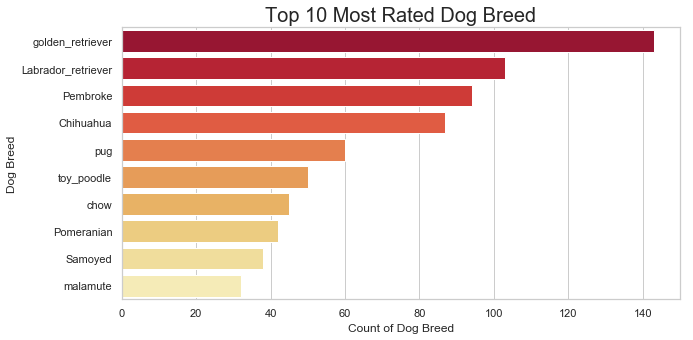

In [5]:
x = df['dog_breed_prediction'].value_counts(ascending=False)[0:10].index
y = df['dog_breed_prediction'].value_counts(ascending=False)[0:10]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total crashes
ax = sns.barplot(x=y, y=x, data=df, color=sns.set_palette("YlOrRd_r", 10))

# Add a legend and informative axis label
ax.set(xlim=(0, 150), ylabel="Dog Breed",title='Top 10 Most Rated Dog Breed',
       xlabel="Count of Dog Breed")

for ax in plt.gcf().axes:
    l = ax.get_title()
    ax.set_title(l, fontsize=20)

Our chart indicates by far that Golden Retriever receive the most rated dog breed on WeRateDogs. Golden Retriever is followed by the also very popular breeds of Labrador Retriever and Pembroke.

<a id='retweet'></a>
### 2.3.2.  Favorites and retweets over the time

How the retweet and favorite count behaved over the time?

We could see some pikes over the time (2016-06 and 2017-02) that represents some virals tweets, but despite these virals, we could see a growing trend of the overall number of retweets and favorites over the time

In [6]:
df.timestamp = pd.to_datetime(df.timestamp)

df.set_index('timestamp', inplace=True)

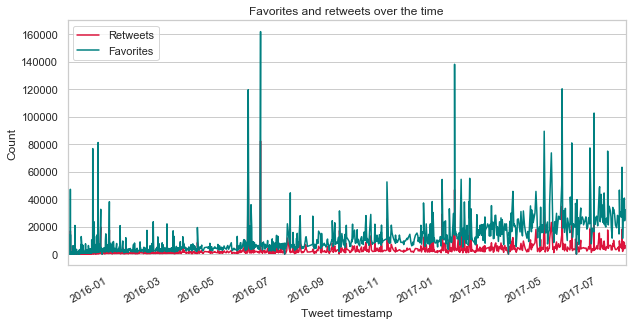

In [7]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

df.retweet_count.plot(label='Retweets', color = 'crimson')
df.favorite_count.plot(label='Favorites', color = 'teal')

# Labels and legend
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.legend(loc='upper left')
ax.grid(axis='x')

# Plot title
plt.title('Favorites and retweets over the time')

plt.show()

<a id='dog_stage'></a>
### 2.3.3.  Most favorite Dog stage

Pupper is by far the most owned dog stage, followed by doggo and floofer.

In [8]:
# Creating an empty list
stage_list = []

# Creating lists of each stage
pupper_list = df.loc[df['dog_stage']=='pupper','dog_stage']
doggo_list = df.loc[df['dog_stage']=='doggo','dog_stage']
floofer_list = df.loc[df['dog_stage']=='floofer','dog_stage']

# We will consider all Doggo stage subgroups as a main stage doggo:
doggo_pupper = df.loc[df['dog_stage']=='doggo,pupper','dog_stage']
doggo_pupper = doggo_pupper.str.split(',').str[0]

doggo_floofer = df.loc[df['dog_stage']=='doggo,floofer','dog_stage']
doggo_floofer = doggo_floofer.str.split(',').str[0]

doggo_puppo = df.loc[df['dog_stage']=='doggo,puppo','dog_stage']
doggo_puppo = doggo_puppo.str.split(',').str[0]

# Appending it all
doggo_list = doggo_list.append([doggo_pupper,doggo_floofer,doggo_puppo])

stage_list = doggo_list.append([pupper_list,floofer_list])

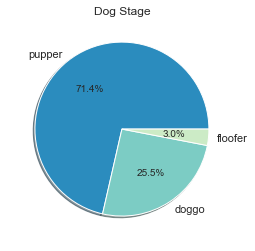

In [10]:
fig1, ax = plt.subplots()
ax.pie(stage_list.value_counts(),
       labels=stage_list.value_counts().index,
       autopct='%1.1f%%', 
       shadow=True,
       colors=sns.set_palette("GnBu_r", 3))
ax.set(title='Dog Stage')
plt.show()